In [1]:
import pandas as pd


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Data_sets/hacktrain.csv')
df

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,1,2,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,3,4,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,...,-1025.880,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,4,5,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,...,-1813.950,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,7,8,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,...,1535.000,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,10537,10538,impervious,1207.7000,984.620,NaN,1166.25,937.478,1072.700,823.896,...,1117.740,1176.600,1044.110,NaN,369.082,465.843,362.882,979.795,NaN,433.659
7996,10538,10539,impervious,2170.3500,1419.720,1361.000,1478.71,983.911,1262.110,1422.860,...,984.634,2128.970,1379.660,NaN,762.633,485.204,446.724,771.747,1589.06,506.936
7997,10541,10542,impervious,1895.6800,1454.740,NaN,1033.56,1930.380,1057.150,1471.600,...,888.408,2093.020,1232.110,1190.830,1441.460,1170.880,1095.000,1818.650,2501.72,1247.770
7998,10542,10543,impervious,3465.7400,1283.320,413.412,4391.05,1146.820,4473.050,1614.750,...,5833.760,4047.320,4515.800,433.177,277.296,744.143,NaN,3759.710,NaN,388.346


Clean the dataframe by filling the Nan values with the mean of each class

In [4]:


import pandas as pd
import numpy as np

# Just to be safe, reset column names if needed
df.columns = df.columns.astype(str)

# Confirm that 'class' and 'ID' are present
print(df.columns.tolist())

# Save and drop non-numeric columns
if 'class' in df.columns and 'ID' in df.columns:
    df_non_numeric = df[['ID', 'class']]  # Keep non-numeric part
    df_numeric = df.drop(columns=['ID', 'class'])  # Numeric part
else:
    raise KeyError("Make sure 'ID' and 'class' columns exist in df")

# Fill NaNs in numeric columns using class-wise group mode
df_numeric_filled = df_numeric.groupby(df_non_numeric['class']).transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else x)
)

# Combine cleaned numeric data with original non-numeric
df_cleaned = pd.concat([df_non_numeric, df_numeric_filled], axis=1)

# Done
df_cleaned


['Unnamed: 0', 'ID', 'class', '20150720_N', '20150602_N', '20150517_N', '20150501_N', '20150415_N', '20150330_N', '20150314_N', '20150226_N', '20150210_N', '20150125_N', '20150109_N', '20141117_N', '20141101_N', '20141016_N', '20140930_N', '20140813_N', '20140626_N', '20140610_N', '20140525_N', '20140509_N', '20140423_N', '20140407_N', '20140322_N', '20140218_N', '20140202_N', '20140117_N', '20140101_N']


,ID,class,Unnamed: 0,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,1,water,0,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,...,-2683.600,-1043.160,-1942.490,267.138,-1445.370,242.500,211.328,-2203.020,-1180.19,433.906
1,2,water,1,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,...,-2683.600,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,4,water,3,58.0174,-1599.160,-2939.740,-1052.63,-1794.870,-1564.630,-1202.710,...,-1025.880,368.622,-2435.900,-1227.800,304.621,242.500,369.214,-2202.120,-1846.33,-1343.550
3,5,water,4,72.5180,-1781.790,380.436,-1256.93,515.805,-1413.180,-802.942,...,-1813.950,155.624,-2435.900,-924.073,432.150,282.833,298.320,-2197.360,-1846.33,-826.727
4,8,water,7,1136.4400,-1781.790,-2939.740,1647.83,1935.800,-1848.910,2158.980,...,1535.000,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,10538,impervious,10537,1207.7000,984.620,-572.470,1166.25,937.478,1072.700,823.896,...,1117.740,1176.600,1044.110,-600.536,369.082,465.843,362.882,979.795,1617.63,433.659
7996,10539,impervious,10538,2170.3500,1419.720,1361.000,1478.71,983.911,1262.110,1422.860,...,984.634,2128.970,1379.660,-600.536,762.633,485.204,446.724,771.747,1589.06,506.936
7997,10542,impervious,10541,1895.6800,1454.740,-572.470,1033.56,1930.380,1057.150,1471.600,...,888.408,2093.020,1232.110,1190.830,1441.460,1170.880,1095.000,1818.650,2501.72,1247.770
7998,10543,impervious,10542,3465.7400,1283.320,413.412,4391.05,1146.820,4473.050,1614.750,...,5833.760,4047.320,4515.800,433.177,277.296,744.143,-232.292,3759.710,1617.63,388.346


In [5]:
from sklearn.preprocessing import LabelEncoder

# drop the ID column:
df_cleaned.drop(columns=['ID'], inplace=True)
# drop the Unammed column:
df_cleaned.drop(columns=['Unnamed: 0'],inplace =True)
# Give the class labels:
label_encoder = LabelEncoder()
df_cleaned['class'] = label_encoder.fit_transform(df_cleaned['class'])
df_cleaned


,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,5,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,-2532.490,-1325.640,...,-2683.600,-1043.160,-1942.490,267.138,-1445.370,242.500,211.328,-2203.020,-1180.19,433.906
1,5,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,-1670.590,-1408.640,...,-2683.600,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,5,58.0174,-1599.160,-2939.740,-1052.63,-1794.870,-1564.630,-1202.710,729.790,-3162.140,...,-1025.880,368.622,-2435.900,-1227.800,304.621,242.500,369.214,-2202.120,-1846.33,-1343.550
3,5,72.5180,-1781.790,380.436,-1256.93,515.805,-1413.180,-802.942,683.254,-2829.400,...,-1813.950,155.624,-2435.900,-924.073,432.150,282.833,298.320,-2197.360,-1846.33,-826.727
4,5,1136.4400,-1781.790,-2939.740,1647.83,1935.800,-1848.910,2158.980,-2532.490,1242.870,...,1535.000,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,3,1207.7000,984.620,-572.470,1166.25,937.478,1072.700,823.896,943.698,944.619,...,1117.740,1176.600,1044.110,-600.536,369.082,465.843,362.882,979.795,1617.63,433.659
7996,3,2170.3500,1419.720,1361.000,1478.71,983.911,1262.110,1422.860,1401.970,1372.680,...,984.634,2128.970,1379.660,-600.536,762.633,485.204,446.724,771.747,1589.06,506.936
7997,3,1895.6800,1454.740,-572.470,1033.56,1930.380,1057.150,1471.600,-500.707,2693.630,...,888.408,2093.020,1232.110,1190.830,1441.460,1170.880,1095.000,1818.650,2501.72,1247.770
7998,3,3465.7400,1283.320,413.412,4391.05,1146.820,4473.050,1614.750,770.469,-1080.560,...,5833.760,4047.320,4515.800,433.177,277.296,744.143,-232.292,3759.710,1617.63,388.346


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = df_cleaned.drop(columns=['class'])
y = df_cleaned['class']
y


,class
0,5
1,5
2,5
3,5
4,5
...,...
7995,3
7996,3
7997,3
7998,3


In [7]:
def calculate_dist( x1 , x2 ) :

  # calculate the euclidean distance:
  return np.sqrt(np.sum((x1 - x2)**2))

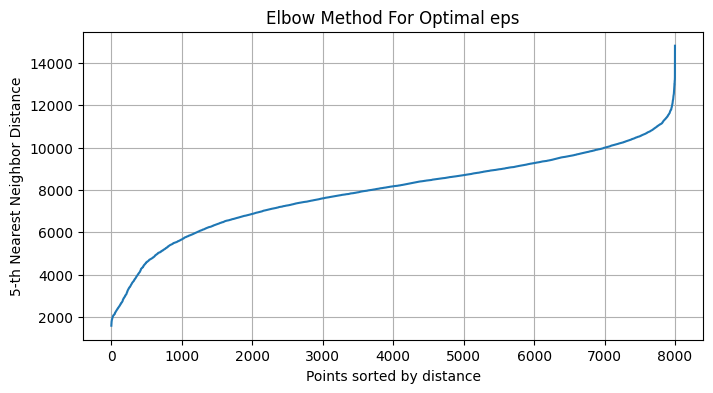

In [8]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Assume X is your dataset (standardized or scaled)
min_samples = 5  # Common default; can adjust

# Fit Nearest Neighbors
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X)

# Get distances to each point's k-th nearest neighbor
distances, indices = neighbors_fit.kneighbors(X)

# Sort distances to k-th nearest neighbor
k_distances = np.sort(distances[:, min_samples - 1])

# Plot the distances
plt.figure(figsize=(8, 4))
plt.plot(k_distances)
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{min_samples}-th Nearest Neighbor Distance')
plt.title('Elbow Method For Optimal eps')
plt.grid(True)
plt.show()


In [9]:
radius=8500# radius of circle
neighbours=[] # [[.....]-0th image ... [.....]-ith image ,..]
# Iterate over the rows of the DataFrame as NumPy arrays
for i, x1 in enumerate(X.values):
  dist=[]
  # only append the points that are <= radius
  for j, x2 in enumerate(X.values):
   if calculate_dist(x1 , x2) <=radius: # Calculate distance between the entire rows (data points)
    dist.append(j) # Append the index of the neighbor
  neighbours.append(dist)


# Now declare the core points:
core_points=[] #[...] list of core_point indices.
for i , points in enumerate(neighbours):
  if len(points) > 5 :
    core_points.append(i)
# now start with a core point and add all the neighbouring core-points to cluster:
total_clusters=[] # [[image_indices_of_ith_cluster]....]

visited={} # for marking the visited points
# make all core_points not visited:
visited = {i: False for i in range(len(X))}



for point in core_points:
  cluster=[]
  if not visited[point]: # add to queue only if the point is not visited
    queue=[]
    queue.append(point) # push the first core point
    visited[point]=True # mark it true

    non_core_points=[] # push all the non core_points that are near to core_points into this list
    while queue:

      front=queue[0]
      cluster.append( queue.pop(0) ) # add to ith cluster
      for neighbour in neighbours[front]:
        if neighbour in core_points and not visited[neighbour]: # push only core_points that are not visited into the queue;
          queue.append(neighbour)
          visited[neighbour]=True
        elif neighbour not in core_points and not visited[neighbour]: # push the non core points that are neighbours
          non_core_points.append(neighbour)
          visited[neighbour] = True
     # now add the non core points into the cluster that are neighbours
    for point in non_core_points:
      cluster.append(point)
    total_clusters.append(cluster)

# create an empty set to store all the cluster points
clusters_set=set()
for cluster in total_clusters:
  clusters_set.update(tuple(cluster)) # add all points of clusters

Outliers=set(range(len(X))) - clusters_set # Outliers= total_points-cluster_points



In [10]:
len(Outliers)

2236

In [11]:
X = X.drop(index=Outliers).reset_index(drop=True)
y = y.drop(index=Outliers).reset_index(drop=True)


In [12]:

# Train the model:
model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=100
)

model.fit(X, y)



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [16]:
# Test the data:
test_df=pd.read_csv('/content/drive/MyDrive/Data_sets/hacktest.csv')

ID=test_df['ID']
# drop the ID column:
test_df.drop(columns=['ID'], inplace=True)
# drop the Unammed column:
test_df.drop(columns=['Unnamed: 0'],inplace =True)
test_df

,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,20150125_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,7466.4200,413.162,5761.000,5625.45,489.4030,3923.84,3097.110,6766.42000,2829.130,6742.570,...,801.184,927.115,4704.14,6378.42,340.949,2695.5700,527.268,4736.75,601.843,6639.760
1,7235.2600,6037.350,1027.560,6085.14,1618.0500,6668.54,2513.990,1051.69000,7268.220,6908.180,...,5533.470,5103.040,5216.12,4885.27,4366.790,1234.1400,3298.110,6942.68,1070.440,842.101
2,7425.0800,6969.980,1177.940,7408.93,861.0610,7644.43,814.458,1504.29000,7002.630,6086.560,...,1981.390,6204.540,7021.69,5704.41,4897.450,1789.9900,2206.100,6928.93,1036.560,831.441
3,7119.1200,1731.620,6311.930,6441.61,465.9790,7128.42,1649.120,6935.22000,2176.800,690.408,...,959.344,5794.150,1045.57,5572.90,586.287,685.9060,1287.000,6734.72,824.584,6883.610
4,7519.5500,8130.260,1482.540,7879.53,1001.2100,7937.60,4122.530,1094.51000,7951.440,8001.350,...,7636.070,6996.760,7413.43,4596.13,4511.700,1413.5200,3283.940,7937.68,1857.800,1336.920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840,-1673.7400,-2514.480,-2451.190,-2738.44,64.4464,-2275.03,-2881.100,-4738.97000,-4293.570,-4402.210,...,-2257.890,-2582.420,-1699.10,-2295.30,306.483,209.4030,221.920,-4885.15,-2630.590,356.233
2841,-96.8233,-412.727,-1795.400,-2363.82,-2168.1900,-2162.68,-3155.740,-4416.11000,-5648.660,-5193.280,...,-3991.910,-2614.910,-2109.84,-2687.18,-2853.890,71.3402,-86.414,-5109.01,324.637,-4316.580
2842,-2364.6000,-155.592,-1422.090,-1713.40,465.6220,-2230.40,-3088.730,-5010.32000,-4211.420,-3354.430,...,-2484.500,-1756.080,-3820.43,-1988.23,433.852,291.8000,254.548,-4259.30,412.115,-1170.750
2843,-3004.6300,-1217.120,180.122,-1113.89,438.4180,-2442.51,-3210.560,-3237.74000,-192.857,-2857.540,...,-3291.490,-2018.450,-3472.65,-3109.07,511.792,369.0970,276.948,-5574.51,298.739,460.419


In [17]:
predicted_val=model.predict(test_df)
print(predicted_val)

# decode the numbers to labels:
y_decoded = label_encoder.inverse_transform(predicted_val)
# create a dataframe for result:
result = pd.DataFrame({
    'ID': ID,
    'class': y_decoded
})
result

[4 1 1 ... 5 5 4]


,ID,class
0,1,orchard
1,2,forest
2,3,forest
3,4,forest
4,5,forest
...,...,...
2840,2841,water
2841,2842,orchard
2842,2843,water
2843,2844,water


In [18]:
result.to_csv("submission.csv", index=False) #this file will appear under the output section of the right navbar. You need to submit this csv file